In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

%load_ext rpy2.ipython

In [2]:
%%R 

suppressPackageStartupMessages({
    library(cowplot)
    library(patchwork)
    library(tidyverse)
    theme_set(theme_cowplot())
})

options(dplyr.width = Inf)

In [3]:
# Set seed with numpy
np.random.seed(123)

# Generate two example time-series of length 16
TS_array = np.random.randn(16, 2)

In [4]:
%%R -i TS_array

# Line plots
as.data.frame(TS_array) %>% 
    mutate(Timepoint = 1:16) %>%
    rename("TS_1" = V1, "TS_2" = V2) %>%
    pivot_longer(cols = c(TS_1, TS_2), names_to = "TS", values_to = "Value") %>%
    ggplot(aes(x = Timepoint, y = Value, color = TS)) +
    geom_line(linewidth=1.25) +
    facet_grid(TS ~ ., scales = "free_y") +
    theme_void() +
    scale_color_manual(values=c("#a663ce", "#67913c")) +
    theme(legend.position="none",
          axis.title=element_blank(),
          strip.text = element_blank())
ggsave("example_time_series_lines.svg", width=3.5, height=1, units="in", dpi=300)

In [5]:
%%R -i TS_array

# Take the first column of TS_array as a data.frame
TS1_heatmap <- as.data.frame(TS_array) %>%
    ggplot(aes(x = 1:16, y = 0, fill=V1)) +
    geom_tile() +
    theme_void() +
    scale_fill_gradient(low="#E8D7F2", high="#a663ce") +
    theme(legend.position="none",
          axis.title=element_blank(),
          strip.text = element_blank())
TS2_heatmap <- as.data.frame(TS_array) %>%
    ggplot(aes(x = 1:16, y = 0, fill=V2)) +
    geom_tile() +
    theme_void() +
    scale_fill_gradient(low="#D9E9C9", high="#67913c") +
    theme(legend.position="none",
          axis.title=element_blank(),
          strip.text = element_blank())

TS1_heatmap / TS2_heatmap
ggsave("example_time_series_vectors.svg", width=3, height=2, units="in", dpi=300)

### Checking TLMI symmetry

In [6]:
import numpy as np
import random

# Set seed with numpy
np.random.seed(123)

M = 2 # 5 independent processes
T = 200 # 500 samples per process

dataset = np.random.randn(M,T) # generate our multivariate time-series

In [7]:
from pyspi.statistics import infotheory
TLMI = infotheory.TimeLaggedMutualInfo()

X=dataset[0,:]
Y=dataset[1,:]

# z-score each array
X_z = (X - np.mean(X)) / np.std(X)
Y_z = (Y - np.mean(Y)) / np.std(Y)

TLMI_XY = TLMI.bivariate(data=X, data2=Y)
TLMI_YX = TLMI.bivariate(data=Y, data2=X)

print(f"TLMI(X->Y) = {TLMI_XY}, TLMI(Y->X) = {TLMI_YX}")

RuntimeError: Unable to import 'infodynamics.measures.continuous.gaussian' without JVM

In [ ]:
from pyspi.calculator import Calculator
calc_tlmi = Calculator(dataset=dataset, configfile="TLMI_config.yaml") # instantiate the calculator object
calc_tlmi.compute()
print(calc_tlmi.table['tlmi_gaussian'])

In [ ]:
calc = Calculator(dataset=dataset) # instantiate the calculator object
calc.compute()

calc_res = deepcopy(calc.table)

In [20]:
calc_res = calc.table
# Iterate over each SPI
calc_res.columns = calc_res.columns.to_flat_index()

# Convert index to column
calc_res.reset_index(level=0, inplace=True)

# Rename index as first brain region
calc_res = calc_res.rename(columns={"index": "TS_from"})

# Pivot data from wide to long
calc_res_long = pd.melt(calc_res, id_vars="TS_from")
calc_res_long['SPI'], calc_res_long['TS_to'] = calc_res_long.variable.str

# Remove variable column
calc_res_long = calc_res_long.drop("variable", 1)


Columnar iteration over characters will be deprecated in future releases.
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


### Joint entropy visualizations

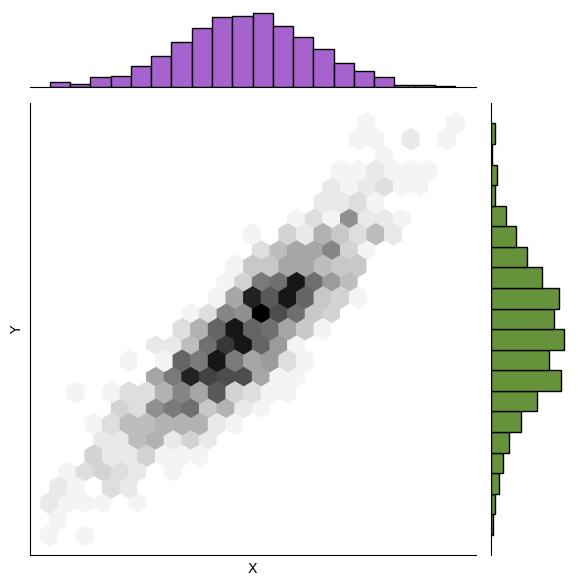

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
x = np.random.normal(0, 1, 1000)
y = x + np.random.normal(0, 0.5, 1000)

# Create the jointplot
g = sns.jointplot(
    x=x, y=y, kind="hex", marginal_kws=dict(fill=True), color="gray"
)

# Clear default histograms and replace them
g.ax_marg_x.clear()
g.ax_marg_x.hist(x, bins=20, color="#a663ce", edgecolor='black')
g.ax_marg_x.set_xticks([])  # Remove x-axis ticks
g.ax_marg_x.set_yticks([])  # Remove y-axis ticks
g.ax_marg_x.tick_params(labelbottom=False, labelleft=False)  # Remove text labels

g.ax_marg_y.clear()
g.ax_marg_y.hist(y, bins=20, color="#66923c", edgecolor='black', orientation="horizontal")
g.ax_marg_y.set_yticks([])  # Remove y-axis ticks
g.ax_marg_y.set_xticks([])  # Remove x-axis ticks
g.ax_marg_y.tick_params(labelbottom=False, labelleft=False)  # Remove text labels

# Add titles or labels if needed
g.ax_joint.set_xlabel("X")  # Retain bottom x-axis label
g.ax_joint.set_ylabel("Y")  # Retain left y-axis label
# g.fig.suptitle("Jointplot with Custom Marginals", y=1.03)  # Adjust title position

# Save the plot as an SVG
plt.savefig("figure_drafting/JE_joint_dist.svg", format="svg")

# Show the plot
plt.show()

In [ ]:
# Figure to distinguish the three axes
# Simulate a normal distribution

In [39]:
%%R 

# Simulate a normal distribution
set.seed(129)
x <- rnorm(25, mean=0, sd=0.25)
y <- rnorm(25, mean=0, sd=0.25)
z <- rnorm(25, mean=0, sd=0.25)

color_max <- "#c51a7b"

data.frame(time=1:25, x=x, y=y, z=z) %>%
    pivot_longer(cols=c(x, y, z), names_to="sim_name", values_to="value") %>%
    ggplot(aes(x = time, y=value)) +
    geom_line(aes(color=sim_name), size=0.5) +
    scale_color_manual(values=c("#c51a7b", "#fa6a84", "#6c6d9c")) +
    theme_void() +
    theme(legend.position="none")
ggsave("figure_drafting/example_series_lines.svg", width=5, height=1, units="in", dpi=300)


data.frame(x=1:25, sims = x) %>%
    ggplot(aes(x = x, y=0)) +
    geom_tile(aes(fill = sims)) +
    scale_fill_gradient(low="white", high="#c51a7b") +
    theme_void() +
    theme(legend.position="none")
ggsave("figure_drafting/example_series_vector_univariate.svg", width=5, height=0.3, units="in", dpi=300)

# Density plot
data.frame(x=rnorm(1000)) %>%
    ggplot(aes(x = x)) +
    geom_density(fill="#c51a7b") +
    theme_void() +
    theme(legend.position="none")
ggsave("figure_drafting/example_series_vector_univariate_density.svg", width=4, height=2, units="in", dpi=300)


y_plot <- data.frame(times=1:25, value=y) %>%
    ggplot(aes(x = times, y=0)) +
    geom_tile(aes(fill = value)) +
    scale_fill_gradient(low="white", high="#fa6a84") +
    theme_void() +
    theme(legend.position="none")
z_plot <- data.frame(times=1:25, value=z) %>%
    ggplot(aes(x = times, y=0)) +
    geom_tile(aes(fill = value)) +
    scale_fill_gradient(low="white", high="#6c6d9c") +
    theme_void() +
    theme(legend.position="none")
wrap_plots(y_plot, z_plot, nrow=2)
ggsave("figure_drafting/example_series_vector_bivariate.svg", width=5, height=0.8, units="in", dpi=300)

In [21]:
%%R 

# Simulate a normal distribution
set.seed(127)
sims <- runif(25)

color_max <- "#c51a7b"

data.frame(x=1:25, sims = sims) %>%
    ggplot(aes(x = x, y=0)) +
    geom_tile(aes(fill = sims)) +
    scale_fill_gradient(low="white", high="#c51a7b") +
    theme_void() +
    theme(legend.position="none")
ggsave("figure_drafting/example_series_vector_univariate.svg", width=5, height=0.3, units="in", dpi=300)